<a href="https://colab.research.google.com/github/vjanapaty/Estuarine_Research/blob/main/MLAlgorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('drive')
os.chdir('drive/MyDrive/2022 SNPS')

Mounted at drive


# RANDOM FORREST REGRESSION ALGORITHM

Temp
Mean Absolute Error: 0.37 degrees.
Accuracy: 100.84 %.
Variable: B6                   Importance: 0.27
Variable: B5                   Importance: 0.23
Variable: B3                   Importance: 0.15
Variable: B1                   Importance: 0.11
Variable: B2                   Importance: 0.09
Variable: B7                   Importance: 0.08
Variable: B4                   Importance: 0.06
R^2: 0.9666609037780407




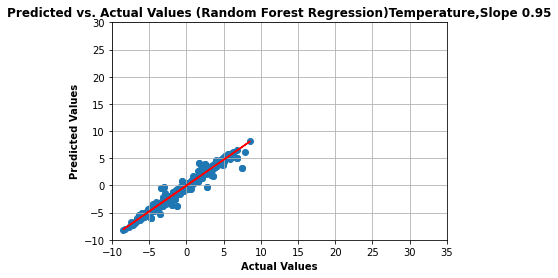

SpCond
Mean Absolute Error: 1.12 degrees.
Accuracy: 99.84 %.
Variable: B6                   Importance: 0.23
Variable: B7                   Importance: 0.15
Variable: B1                   Importance: 0.14
Variable: B2                   Importance: 0.14
Variable: B5                   Importance: 0.13
Variable: B3                   Importance: 0.11
Variable: B4                   Importance: 0.1
R^2: 0.8943744383547813




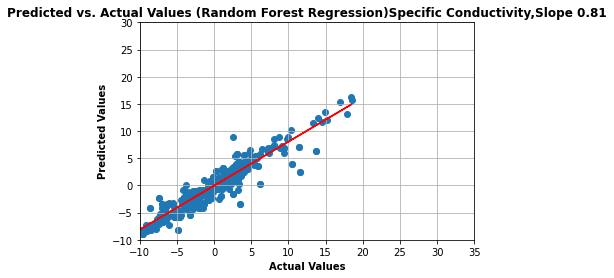

Sal
Mean Absolute Error: 0.74 degrees.
Accuracy: 118.45 %.
Variable: B6                   Importance: 0.26
Variable: B2                   Importance: 0.15
Variable: B7                   Importance: 0.14
Variable: B1                   Importance: 0.13
Variable: B3                   Importance: 0.12
Variable: B5                   Importance: 0.11
Variable: B4                   Importance: 0.1
R^2: 0.8998792753052045




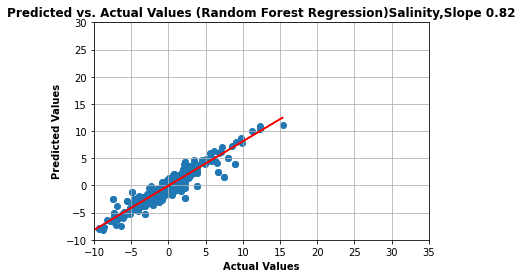

DO
Mean Absolute Error: 0.19 degrees.
Accuracy: 97.39 %.
Variable: B6                   Importance: 0.28
Variable: B1                   Importance: 0.17
Variable: B2                   Importance: 0.17
Variable: B5                   Importance: 0.12
Variable: B4                   Importance: 0.1
Variable: B3                   Importance: 0.08
Variable: B7                   Importance: 0.08
R^2: 0.9122664021400058




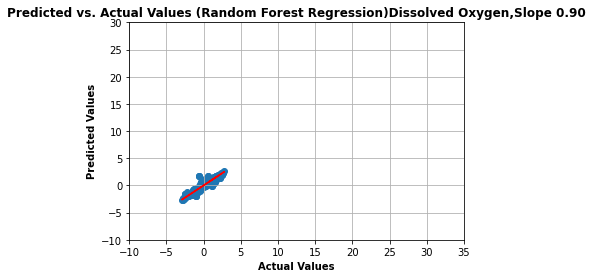

pH
Mean Absolute Error: 0.04 degrees.
Accuracy: 107.1 %.
Variable: B6                   Importance: 0.19
Variable: B4                   Importance: 0.16
Variable: B1                   Importance: 0.14
Variable: B3                   Importance: 0.13
Variable: B7                   Importance: 0.13
Variable: B2                   Importance: 0.12
Variable: B5                   Importance: 0.12
R^2: 0.773623956587134




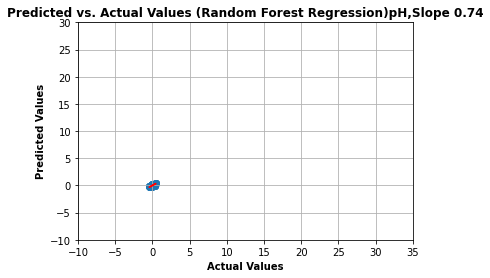

Turb
Mean Absolute Error: 7.52 degrees.
Accuracy: 120.77 %.
Variable: B6                   Importance: 0.18
Variable: B1                   Importance: 0.15
Variable: B5                   Importance: 0.15
Variable: B7                   Importance: 0.15
Variable: B4                   Importance: 0.13
Variable: B3                   Importance: 0.12
Variable: B2                   Importance: 0.11
R^2: 0.8099073475954743




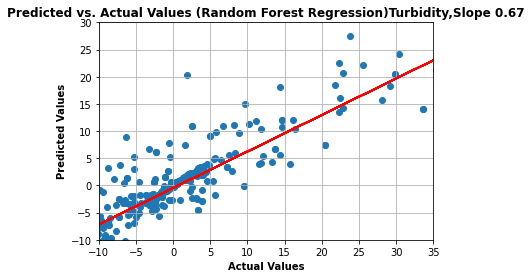

PO4F
Mean Absolute Error: 0.01 degrees.
Accuracy: 128.84 %.
Variable: B6                   Importance: 0.22
Variable: B4                   Importance: 0.17
Variable: B5                   Importance: 0.16
Variable: B7                   Importance: 0.13
Variable: B1                   Importance: 0.11
Variable: B2                   Importance: 0.11
Variable: B3                   Importance: 0.1
R^2: 0.8754665555941806




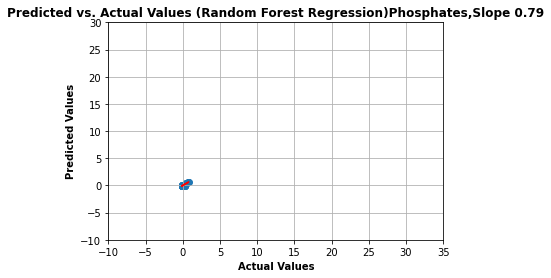

NH4F
Mean Absolute Error: 0.04 degrees.
Accuracy: 102.98 %.
Variable: B7                   Importance: 0.3
Variable: B1                   Importance: 0.16
Variable: B6                   Importance: 0.15
Variable: B2                   Importance: 0.12
Variable: B5                   Importance: 0.12
Variable: B3                   Importance: 0.07
Variable: B4                   Importance: 0.07
R^2: 0.5837397927454286




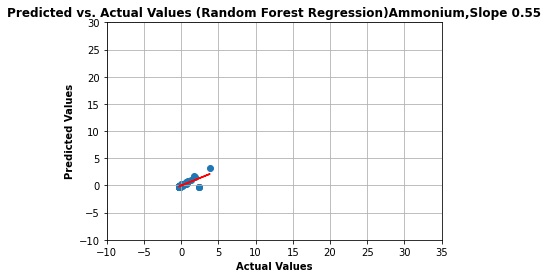

NO23F
Mean Absolute Error: 0.04 degrees.
Accuracy: 129.34 %.
Variable: B6                   Importance: 0.23
Variable: B3                   Importance: 0.18
Variable: B4                   Importance: 0.14
Variable: B5                   Importance: 0.13
Variable: B2                   Importance: 0.11
Variable: B1                   Importance: 0.1
Variable: B7                   Importance: 0.1
R^2: 0.8758132573233




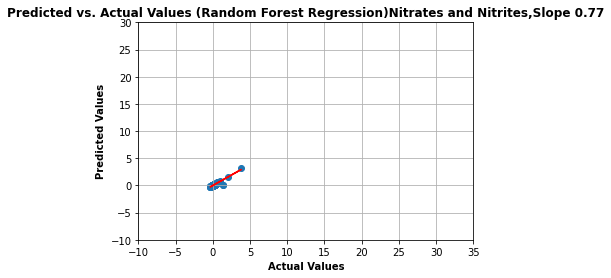

CHLA
Mean Absolute Error: 1.04 degrees.
Accuracy: 35.55 %.
Variable: B6                   Importance: 0.24
Variable: B1                   Importance: 0.2
Variable: B3                   Importance: 0.18
Variable: B2                   Importance: 0.12
Variable: B4                   Importance: 0.09
Variable: B5                   Importance: 0.09
Variable: B7                   Importance: 0.08
R^2: 0.8258579146232612




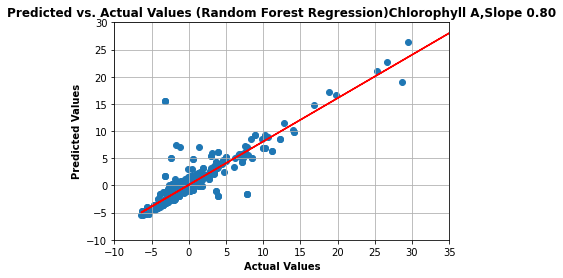

In [ ]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


ops = ["Temp",	"SpCond","Sal",	"DO",	"pH",	"Turb",	"PO4F",	"NH4F",	"NO23F",	"CHLA"]
opFull = ["Temperature",	"Specific Conductivity","Salinity",	"Dissolved Oxygen",	"pH",	"Turbidity",
          "Phosphates",	"Ammonium",	"Nitrates and Nitrites",	"Chlorophyll A"]
i=0
for op in ops:
  # Read in data and display first 5 rows

  features = pd.read_csv('ML/5est_0M.csv')

  # Use numpy to convert to arrays

  # Labels are the values we want to predict
  labels = np.array(features[op])
  print(op)
  # Remove the labels from the features
  # axis 1 refers to the columns
  features= features.drop(["Temp",	"SpCond","Sal",	"DO",	"pH",	"Turb",	"PO4F",	"NH4F",	"NO23F",	"CHLA","Action1",	"Action2","Action3"], axis = 1)

  # Saving feature names for later use
  feature_list = list(features.columns)
  # Convert to numpy array
  features = np.array(features)

  # Using Skicit-learn to split data into training and testing sets
  from sklearn.model_selection import train_test_split
  # Split the data into training and testing sets
  train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)
  #print('Training Features Shape:', train_features.shape)
  #print('Training Labels Shape:', train_labels.shape)
  #print('Testing Features Shape:', test_features.shape)
  #print('Testing Labels Shape:', test_labels.shape)

  # Import the model we are using
  # Instantiate model with 1000 decision trees
  rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
  # Train the model on training data
  rf.fit(train_features, train_labels);
  # Use the forest's predict method on the test data
  predictions = rf.predict(test_features)
  # Calculate the absolute errors
  errors = abs(predictions - test_labels)
  # Print out the mean absolute error (mae)
  print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
  # Calculate mean absolute percentage error (MAPE)
  mape = 100 * (errors / test_labels)
  # Calculate and display accuracy
  accuracy = 100 - np.mean(mape)
  print('Accuracy:', round(accuracy, 2), '%.')

  # Get numerical feature importances
  importances = list(rf.feature_importances_)
  # List of tuples with variable and importance
  feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

  # Sort the feature importances by most important first
  feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
  # Print out the feature and importances 
  [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

  r2 = r2_score(test_labels,predictions)
  print('R^2:', r2)
  print("\n")
  y = predictions
  x = test_labels
  #find line of best fit
  a, b = np.polyfit(x, y, 1)
  plt.xlabel("Actual Values",fontweight="bold")
  #correlation = y.corr(x)
  plt.ylabel("Predicted Values",fontweight="bold")
  plt.title("Predicted vs. Actual Values (Random Forest Regression) " + opFull[i]+", " "Slope " + str("{:.2f}".format(a)),fontweight="bold")
  #add points to plot
  plt.xlim([-10, 35])
  plt.ylim([-10, 30])
  plt.scatter(x, y)
  plt.grid(b='True')
  plt.plot(x, a*x+b, color='red')
  plt.show()
  i=i+1;

# DECISION TREE REGRESSION ALGORITHM

Temp
Mean Absolute Error: 0.13 degrees.
Accuracy: 102.42 %.
Variable: B6                   Importance: 0.29
Variable: B5                   Importance: 0.23
Variable: B3                   Importance: 0.14
Variable: B1                   Importance: 0.12
Variable: B2                   Importance: 0.12
Variable: B7                   Importance: 0.08
Variable: B4                   Importance: 0.03
R^2: 0.9763540368010034




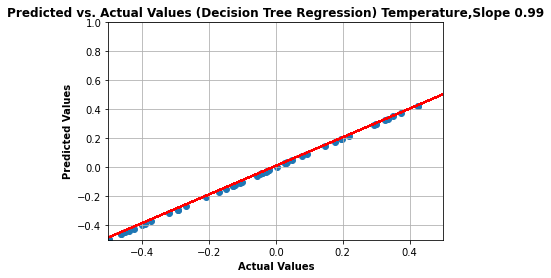

SpCond
Mean Absolute Error: 0.21 degrees.
Accuracy: 97.94 %.
Variable: B6                   Importance: 0.23
Variable: B4                   Importance: 0.17
Variable: B5                   Importance: 0.14
Variable: B7                   Importance: 0.14
Variable: B1                   Importance: 0.12
Variable: B2                   Importance: 0.11
Variable: B3                   Importance: 0.09
R^2: 0.9692705552947719




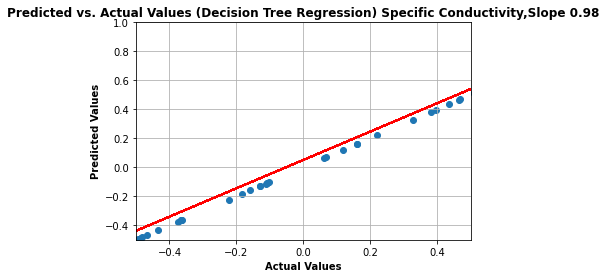

Sal
Mean Absolute Error: 0.16 degrees.
Accuracy: 70.89 %.
Variable: B6                   Importance: 0.22
Variable: B2                   Importance: 0.17
Variable: B7                   Importance: 0.16
Variable: B5                   Importance: 0.14
Variable: B1                   Importance: 0.12
Variable: B3                   Importance: 0.11
Variable: B4                   Importance: 0.08
R^2: 0.9621610086602562




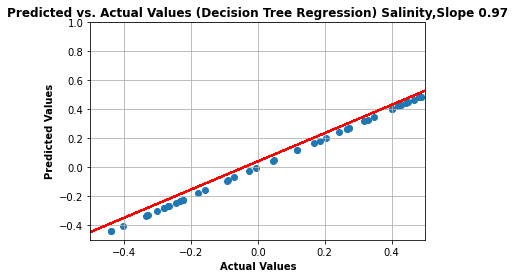

DO
Mean Absolute Error: 0.07 degrees.
Accuracy: 99.92 %.
Variable: B6                   Importance: 0.26
Variable: B1                   Importance: 0.19
Variable: B2                   Importance: 0.16
Variable: B5                   Importance: 0.15
Variable: B7                   Importance: 0.11
Variable: B4                   Importance: 0.1
Variable: B3                   Importance: 0.03
R^2: 0.9157076558813078




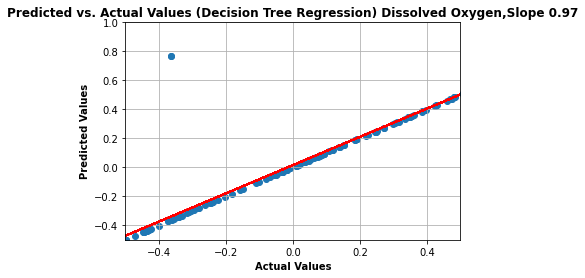

pH
Mean Absolute Error: 0.02 degrees.
Accuracy: 101.57 %.
Variable: B7                   Importance: 0.2
Variable: B6                   Importance: 0.19
Variable: B4                   Importance: 0.17
Variable: B2                   Importance: 0.13
Variable: B3                   Importance: 0.13
Variable: B1                   Importance: 0.1
Variable: B5                   Importance: 0.09
R^2: 0.7605165230565297




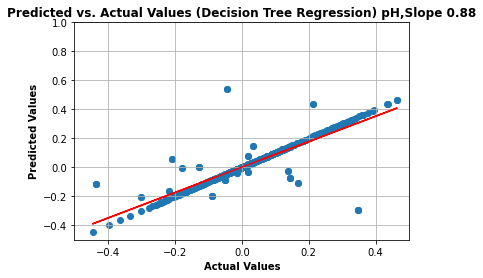

Turb
Mean Absolute Error: 2.01 degrees.
Accuracy: 104.78 %.
Variable: B6                   Importance: 0.22
Variable: B2                   Importance: 0.17
Variable: B1                   Importance: 0.16
Variable: B7                   Importance: 0.16
Variable: B3                   Importance: 0.14
Variable: B5                   Importance: 0.11
Variable: B4                   Importance: 0.04
R^2: 0.9274688640667006




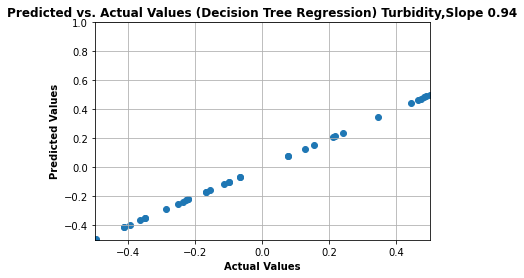

PO4F
Mean Absolute Error: 0.0 degrees.
Accuracy: 96.85 %.
Variable: B4                   Importance: 0.3
Variable: B5                   Importance: 0.2
Variable: B6                   Importance: 0.15
Variable: B2                   Importance: 0.11
Variable: B1                   Importance: 0.09
Variable: B7                   Importance: 0.08
Variable: B3                   Importance: 0.07
R^2: 0.9106783068602833




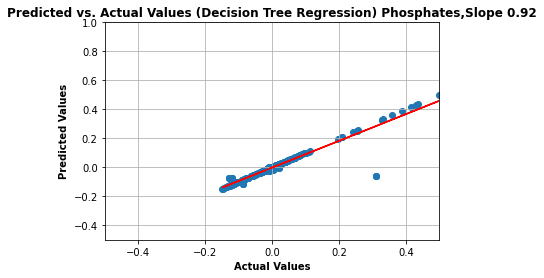

NH4F
Mean Absolute Error: 0.02 degrees.
Accuracy: 101.73 %.
Variable: B7                   Importance: 0.41
Variable: B1                   Importance: 0.19
Variable: B5                   Importance: 0.1
Variable: B2                   Importance: 0.09
Variable: B6                   Importance: 0.09
Variable: B3                   Importance: 0.07
Variable: B4                   Importance: 0.04
R^2: 0.6042923797354085




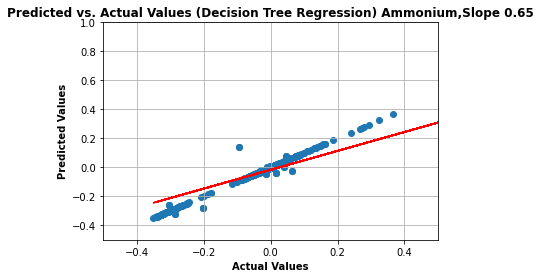

NO23F
Mean Absolute Error: 0.01 degrees.
Accuracy: 89.35 %.
Variable: B6                   Importance: 0.33
Variable: B3                   Importance: 0.17
Variable: B4                   Importance: 0.16
Variable: B5                   Importance: 0.16
Variable: B1                   Importance: 0.08
Variable: B7                   Importance: 0.05
Variable: B2                   Importance: 0.04
R^2: 0.9174166115909345




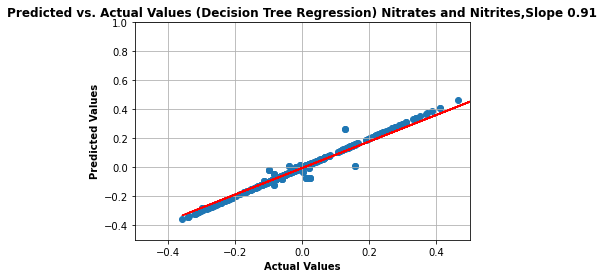

CHLA
Mean Absolute Error: 0.27 degrees.
Accuracy: 98.93 %.
Variable: B1                   Importance: 0.34
Variable: B6                   Importance: 0.2
Variable: B2                   Importance: 0.19
Variable: B3                   Importance: 0.09
Variable: B5                   Importance: 0.09
Variable: B4                   Importance: 0.07
Variable: B7                   Importance: 0.03
R^2: 0.9296491838550383




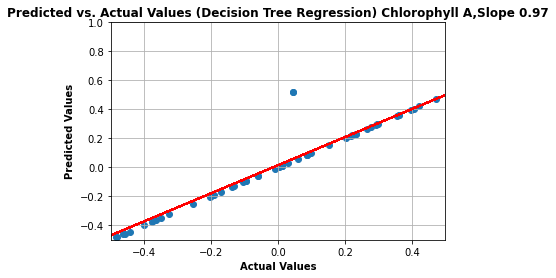

In [ ]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

ops = ["Temp",	"SpCond","Sal",	"DO",	"pH",	"Turb",	"PO4F",	"NH4F",	"NO23F",	"CHLA"]
opFull = ["Temperature",	"Specific Conductivity","Salinity",	"Dissolved Oxygen",	"pH",	"Turbidity",
          "Phosphates",	"Ammonium",	"Nitrates and Nitrites",	"Chlorophyll A"]
i=0
for op in ops:
  # Read in data and display first 5 rows

  features = pd.read_csv('ML/5est_0M.csv')

  # Use numpy to convert to arrays

  # Labels are the values we want to predict
  labels = np.array(features[op])
  print(op)
  # Remove the labels from the features
  # axis 1 refers to the columns
  features= features.drop(["Temp",	"SpCond","Sal",	"DO",	"pH",	"Turb",	"PO4F",	"NH4F",	"NO23F",	"CHLA","Action1",	"Action2","Action3"], axis = 1)

  # Saving feature names for later use
  feature_list = list(features.columns)
  # Convert to numpy array
  features = np.array(features)

  # Using Skicit-learn to split data into training and testing sets
  from sklearn.model_selection import train_test_split
  # Split the data into training and testing sets
  train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)
  #print('Training Features Shape:', train_features.shape)
  #print('Training Labels Shape:', train_labels.shape)
  #print('Testing Features Shape:', test_features.shape)
  #print('Testing Labels Shape:', test_labels.shape)

  # Import the model we are using
  # Instantiate model with 1000 decision trees
  dt = DecisionTreeRegressor()
  # Train the model on training data
  dt.fit(train_features, train_labels);
  # Use the forest's predict method on the test data
  predictions = dt.predict(test_features)
  # Calculate the absolute errors
  errors = abs(predictions - test_labels)
  # Print out the mean absolute error (mae)
  print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
  # Calculate mean absolute percentage error (MAPE)
  mape = 100 * (errors / test_labels)
  # Calculate and display accuracy
  accuracy = 100 - np.mean(mape)
  print('Accuracy:', round(accuracy, 2), '%.')

  # Get numerical feature importances
  importances = list(dt.feature_importances_)
  # List of tuples with variable and importance
  feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

  # Sort the feature importances by most important first
  feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
  # Print out the feature and importances 
  [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

  r2 = r2_score(test_labels,predictions)
  print('R^2:', r2)
  print("\n")
  y = predictions
  x = test_labels
  #find line of best fit
  a, b = np.polyfit(x, y, 1)
  plt.xlabel("Actual Values",fontweight="bold")
  #correlation = y.corr(x)
  plt.ylabel("Predicted Values",fontweight="bold")
  plt.title("Predicted vs. Actual Values (Decision Tree Regression) " + opFull[i]+"," +"Slope " + str("{:.2f}".format(a)),fontweight="bold")
  #add points to plot
  plt.xlim([-0.5, 0.5])
  plt.ylim([-0.5, 1])
  plt.scatter(x, y)
  plt.grid(b='True')
  plt.plot(x, a*x+b, color='red')
  plt.show()
  i=i+1

# K NEAREST NEIGHBORS REGRESSION

In [ ]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

ops = ["Temp",	"SpCond","Sal",	"DO",	"pH",	"Turb",	"PO4F",	"NH4F",	"NO23F",	"CHLA"]

for op in ops:
  # Read in data and display first 5 rows

  features = pd.read_csv('ML/5est_0M.csv')

  # Use numpy to convert to arrays

  # Labels are the values we want to predict
  labels = np.array(features[op])
  print(op)
  # Remove the labels from the features
  # axis 1 refers to the columns
  features= features.drop(["Temp",	"SpCond","Sal",	"DO",	"pH",	"Turb",	"PO4F",	"NH4F",	"NO23F",	"CHLA","Action1",	"Action2","Action3"], axis = 1)

  # Saving feature names for later use
  feature_list = list(features.columns)
  # Convert to numpy array
  features = np.array(features)

  # Using Skicit-learn to split data into training and testing sets
  from sklearn.model_selection import train_test_split
  # Split the data into training and testing sets
  train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)
  #print('Training Features Shape:', train_features.shape)
  #print('Training Labels Shape:', train_labels.shape)
  #print('Testing Features Shape:', test_features.shape)
  #print('Testing Labels Shape:', test_labels.shape)

  # Import the model we are using
  # Instantiate model with 1000 decision trees
  knn = KNeighborsRegressor(n_neighbors=3)
  # Train the model on training data
  knn.fit(train_features, train_labels);
  # Use the forest's predict method on the test data
  predictions = knn.predict(test_features)
  # Calculate the absolute errors
  errors = abs(predictions - test_labels)
  # Print out the mean absolute error (mae)
  print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
  # Calculate mean absolute percentage error (MAPE)
  mape = 100 * (errors / test_labels)
  # Calculate and display accuracy
  accuracy = 100 - np.mean(mape)
  print('Accuracy:', round(accuracy, 2), '%.')

  r2 = r2_score(test_labels,predictions)
  print('R^2:', r2)
  print("\n")

# LASSO REGRESSION

In [ ]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

ops = ["Temp",	"SpCond","Sal",	"DO",	"pH",	"Turb",	"PO4F",	"NH4F",	"NO23F",	"CHLA"]

for op in ops:
  # Read in data and display first 5 rows

  features = pd.read_csv('ML/5est_0M.csv')

  # Use numpy to convert to arrays

  # Labels are the values we want to predict
  labels = np.array(features[op])
  print(op)
  # Remove the labels from the features
  # axis 1 refers to the columns
  features= features.drop(["Temp",	"SpCond","Sal",	"DO",	"pH",	"Turb",	"PO4F",	"NH4F",	"NO23F",	"CHLA","Action1",	"Action2","Action3"], axis = 1)

  # Saving feature names for later use
  feature_list = list(features.columns)
  # Convert to numpy array
  features = np.array(features)

  # Using Skicit-learn to split data into training and testing sets
  from sklearn.model_selection import train_test_split
  # Split the data into training and testing sets
  train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

  # Import the model we are using
  # Instantiate model with 1000 decision trees
  la = Lasso()
  # Train the model on training data
  la.fit(train_features, train_labels);
  # Use the forest's predict method on the test data
  predictions = la.predict(test_features)
  # Calculate the absolute errors
  errors = abs(predictions - test_labels)
  # Print out the mean absolute error (mae)
  print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
  # Calculate mean absolute percentage error (MAPE)
  mape = 100 * (errors / test_labels)
  # Calculate and display accuracy
  accuracy = 100 - np.mean(mape)
  print('Accuracy:', round(accuracy, 2), '%.')

  r2 = r2_score(test_labels,predictions)
  print('R^2:', r2)
  print("\n")

# RIDGE REGRESSION

In [ ]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

ops = ["Temp",	"SpCond","Sal",	"DO",	"pH",	"Turb",	"PO4F",	"NH4F",	"NO23F",	"CHLA"]

for op in ops:
  # Read in data and display first 5 rows

  features = pd.read_csv('ML/5est_0M.csv')

  # Use numpy to convert to arrays

  # Labels are the values we want to predict
  labels = np.array(features[op])
  print(op)
  # Remove the labels from the features
  # axis 1 refers to the columns
  features= features.drop(["Temp",	"SpCond","Sal",	"DO",	"pH",	"Turb",	"PO4F",	"NH4F",	"NO23F",	"CHLA","Action1",	"Action2","Action3"], axis = 1)

  # Saving feature names for later use
  feature_list = list(features.columns)
  # Convert to numpy array
  features = np.array(features)

  # Using Skicit-learn to split data into training and testing sets
  from sklearn.model_selection import train_test_split
  # Split the data into training and testing sets
  train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

  # Import the model we are using
  # Instantiate model with 1000 decision trees
  ri = Ridge()
  # Train the model on training data
  ri.fit(train_features, train_labels);
  # Use the forest's predict method on the test data
  predictions = ri.predict(test_features)
  # Calculate the absolute errors
  errors = abs(predictions - test_labels)
  # Print out the mean absolute error (mae)
  print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
  # Calculate mean absolute percentage error (MAPE)
  mape = 100 * (errors / test_labels)
  # Calculate and display accuracy
  accuracy = 100 - np.mean(mape)
  print('Accuracy:', round(accuracy, 2), '%.')

  r2 = r2_score(test_labels,predictions)
  print('R^2:', r2)
  print("\n")

# LINEAR REGRESSION

In [ ]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

ops = ["Temp",	"SpCond","Sal",	"DO",	"pH",	"Turb",	"PO4F",	"NH4F",	"NO23F",	"CHLA"]

for op in ops:
  # Read in data and display first 5 rows

  features = pd.read_csv('ML/5est_0M.csv')

  # Use numpy to convert to arrays

  # Labels are the values we want to predict
  labels = np.array(features[op])
  print(op)
  # Remove the labels from the features
  # axis 1 refers to the columns
  features= features.drop(["Temp",	"SpCond","Sal",	"DO",	"pH",	"Turb",	"PO4F",	"NH4F",	"NO23F",	"CHLA","Action1",	"Action2","Action3"], axis = 1)

  # Saving feature names for later use
  feature_list = list(features.columns)
  # Convert to numpy array
  features = np.array(features)

  # Using Skicit-learn to split data into training and testing sets
  from sklearn.model_selection import train_test_split
  # Split the data into training and testing sets
  train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.2, random_state = 42)

  # Import the model we are using
  # Instantiate model with 1000 decision trees
  lr = LinearRegression()
  # Train the model on training data
  lr.fit(train_features, train_labels);
  # Use the forest's predict method on the test data
  predictions = lr.predict(test_features)
  # Calculate the absolute errors
  errors = abs(predictions - test_labels)
  # Print out the mean absolute error (mae)
  print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
  # Calculate mean absolute percentage error (MAPE)
  mape = 100 * (errors / test_labels)
  # Calculate and display accuracy
  accuracy = 100 - np.mean(mape)
  print('Accuracy:', round(accuracy, 2), '%.')

  r2 = r2_score(test_labels,predictions)
  print('R^2:', r2)
  print("\n")

# CORRRELATION MATRIX

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  from ipykernel import kernelapp as app


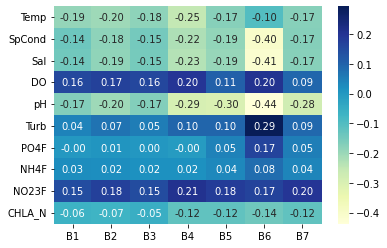

In [ ]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('All_Bands_CSV_files/all_estuaries.csv')
df.rename(columns={'B1_mean': 'B1', 'B2_mean': 'B2', 'B3_mean': 'B3'
, 'B4_mean': 'B4', 'B5_mean': 'B5', 'B6_mean': 'B6'
, 'B7_mean': 'B7', 'DO_mgl_mean': 'DO', 'Temp_mean': 'Temp', 'SpCond_mean': 'SpCond',
'Sal_mean': 'Sal', 'NO23F_mean': 'NO23F', 'PO4F_mean': 'PO4F', 'NH4F_mean': 'NH4F'
, 'CHLA_N_mean': 'CHLA_N', 'Turb_mean': 'Turb', 'pH_mean':'pH'}, inplace=True)
df.head(5)
df.drop(['Unnamed: 0','Unnamed: 0.1', 'NO2F_mean', 'NO2F_anomaly', 'NO3F_mean', "NO3F_anomaly"], 1, inplace=True)
corrmatrix = df.corr()
corrmatrix

c = corrmatrix.drop([ 'Temp',	'SpCond',	'Sal', 'DO', 'pH',	'Turb',	'PO4F','NH4F','NO23F',
                     'CHLA_N'], 1).drop(['B1', 'B2', 'B3', 'B4', 'B5',  'B6', 'B7'])




sns.heatmap(c,fmt='.2f',annot=True, cmap="YlGnBu")
